# Linear Regression

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). It follows the formula: $$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$$

where: $y$ is the dependent variable, $x_1, x_2, ..., x_n$ are the independent variables, $\beta_0, \beta_1, \beta_2, ..., \beta_n$ are the coefficients, and $\epsilon$ is the error term.

This is simplified into 

$$\hat{y} = w \cdot X + b$$

where $w$ is the weight vector, $X$ is the feature vector, and $b$ is the bias.

## Goal

Approximate $w$ and $b$ such that the error is minimized.

## Cost Function

The cost function is the Mean Squared Error (MSE) which is defined as:

$$MSE = J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$$

where $m$ is the number of samples.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [5]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
X, y = datasets.make_regression(n_samples=200, n_features=4, noise=10, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [20]:
def plot(X, y, title='', slope=None, intercept=None):
    # plot all features of X with y
    fig, axs = plt.subplots(2, 2, figsize=(7, 7))
    for i in range(4):
        ax = axs[i // 2, i % 2]
        sns.scatterplot(x=X[:, i], y=y, ax=ax)
        ax.set_title(f'Feature {i}')

        if slope is not None and intercept is not None:
            x_values = np.linspace(X[:, i].min(), X[:, i].max(), 2)
            y_values = slope[i] * x_values + intercept
            ax.plot(x_values, y_values, color='red')

    plt.suptitle(title)
    plt.show()

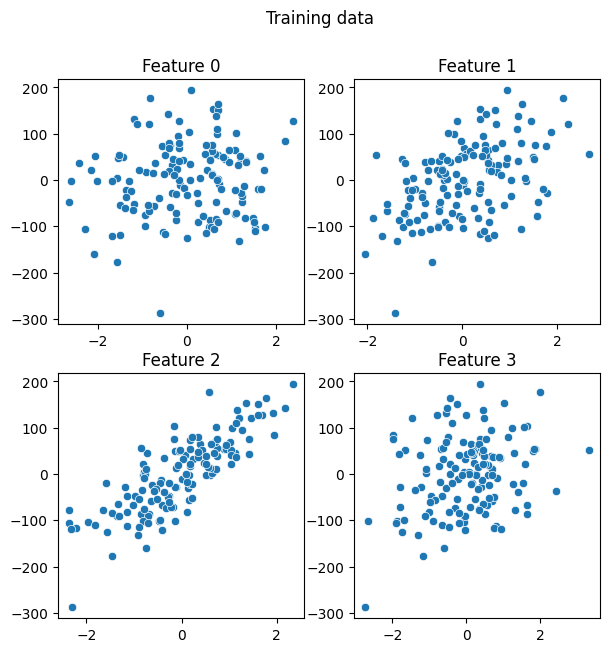

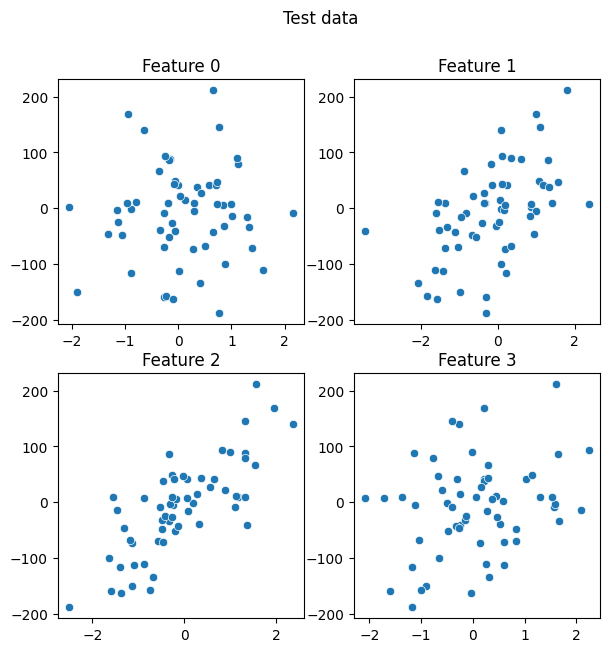

In [21]:
plot(X_train, y_train, title='Training data')
plot(X_test, y_test, title='Test data')

### Using scikit learn

In [22]:
lin_reg_sk = LinearRegression()
lin_reg_sk.fit(X_train, y_train)
y_pred_sk = lin_reg_sk.predict(X_test)

print(f'MSE (sklearn): {mse(y_test, y_pred_sk)}')

MSE (sklearn): 91.93732232059122


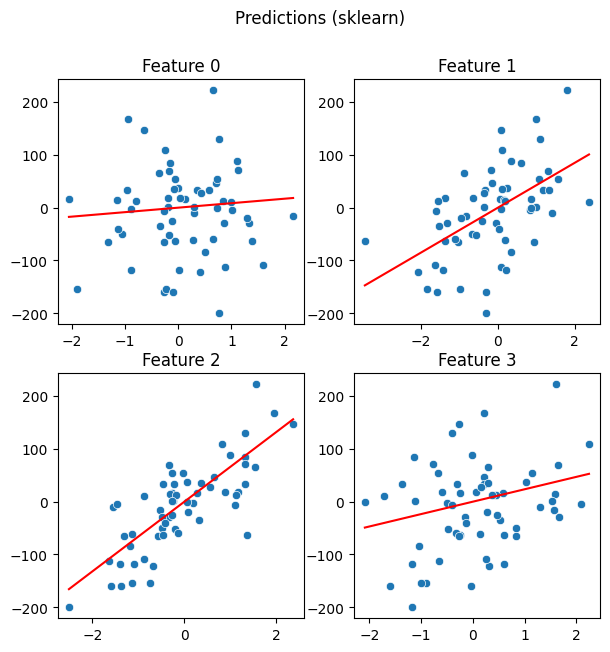

In [23]:
plot(X_test, y_pred_sk, title='Predictions (sklearn)', slope=lin_reg_sk.coef_, intercept=lin_reg_sk.intercept_)

### Implementing Linear Regression


$ y = X \cdot \theta  $

where:
- $X$ is an $m \times n$ matrix (with $m$ samples and $n$ features).
- $\theta$ is the vector of parameters (both coefficients and intercept/bias).
- $y$ is the vector of target values (of size $m$).

We augment $X$ with a column of ones (denoted $X_b$) to account for the intercept term:

$$ X_b = \begin{bmatrix} x_{11} & x_{12} & \dots & x_{1n} & 1 \\ x_{21} & x_{22} & \dots & x_{2n} & 1 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\  x_{m1} & x_{m2} & \dots & x_{mn} & 1 \end{bmatrix} $$


Now, we seek the parameter vector $\theta$ that minimizes the **sum of squared residuals** (differences between actual and predicted values). This is formalized as minimizing the **cost function**:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - \hat{y}_i \right)^2 = \frac{1}{2m} \| y - X_b \theta \|^2 $$

$$ \dots $$

Note: We divide by $2m$ Instead of $m$:

When we take the derivative of the cost function $J(\theta)$ with respect to $\theta$, the squared term will generate a factor of 2 when differentiated:
$$ \frac{\partial}{\partial \theta_j} \left( \frac{1}{m} \sum_{i=1}^{m} \left( y_i - \hat{y}_i \right)^2 \right) = \frac{2}{m} \sum_{i=1}^{m} \left( y_i - \hat{y}_i \right) (-X_{ij}) $$

This factor of 2 is a result of differentiating the squared loss term. So we divide the cost function by 2 to cancel out the 2 that appears during differentiation. This simplifies the expression for the gradient of the cost function.

$$ \dots $$

### Derivation of the Normal Equation:
To minimize the cost function $J(\theta)$, we can take its derivative with respect to $\theta$ and set it to zero.

1. The cost function can be written as:

   $ J(\theta) = \frac{1}{2m} \| y - X_b \theta \|^2 = \frac{1}{2m} \left( y - X_b \theta \right)^T \left( y - X_b \theta \right) $
   

2. The gradient of $J(\theta)$ with respect to $\theta$ is:

   $ \nabla_\theta J(\theta) = -\frac{1}{m} X_b^T (y - X_b \theta) $
   

3. Set the gradient to zero to find the optimal $\theta$:

   $ 0 = -X_b^T (y - X_b \theta) $
   

4. Simplify and solve for $\theta$:

   $ X_b^T X_b \theta = X_b^T y $
   

5. Finally, solve for $\theta$ by multiplying both sides by the inverse of $X_b^T X_b$:

   $ \theta = (X_b^T X_b)^{-1} X_b^T y $
   

This is the **normal equation**, which gives the closed-form solution for the parameters $\theta$ that minimize the squared error.

In [24]:
class LinearRegression:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_b = np.hstack([np.ones((X.shape[0], 1)), X])
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept_, self.coef_ = theta[0], theta[1:]

    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print(f'MSE (custom): {mse(y_test, y_pred)}')

MSE (custom): 91.93732232059122


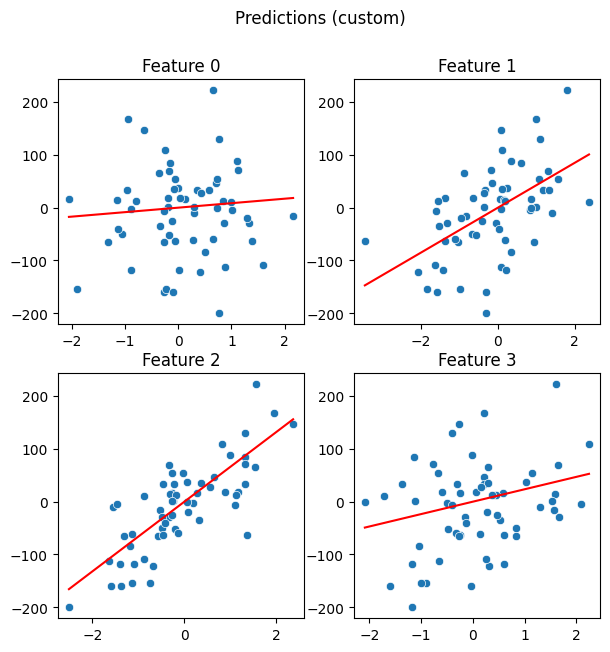

In [26]:
plot(X_test, y_pred, title='Predictions (custom)', slope=lin_reg.coef_, intercept=lin_reg.intercept_)